In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns

In [2]:
# Some defaults for beautiful plots
%matplotlib inline
sns.set()
sns.set_palette("GnBu")

# K - Nearest Neighbours 

In this exercise, given a set of N points we want to find the k closest points every point. But the exercise has to be solved without using loops. 

### Problem 1.3.1

Consider a random vector with shape (N,2) representing coordinates. Your task is to find point by point distances.

**Do not use loops, only matrix operations.**

#### Example 
Let's say you have an input matrix `mat_in` of shape (3, 2)

```
Input:
([[4 4]
  [2 2]
  [1 1]])
```

The output matrix `mat_out` should be a symmetric matrix of shape (3, 3) such that `mat_out[i][j]` should represent the distance between `mat_in[i]` and `mat_in[j]`

```
Output:
([[ 0.        ,  2.82842712,  4.24264069],
  [ 2.82842712,  0.        ,  1.41421356],
  [ 4.24264069,  1.41421356,  0.        ]])
```

In [3]:
def get_distances(Z):
    # Your code here
    X,Y = np.atleast_2d(Z[:,0]), np.atleast_2d(Z[:,1])  # Separate X and Y coordinates
    D = np.sqrt((X - X.T)**2 + (Y - Y.T)**2)            # Notice the use of broadcasting and transpose
    return D


In [4]:
# A helper function to plot heatmap using get_distance function
def plot_heatmap(Z): 
    D = get_distances(Z)
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(D, annot=True, ax=ax)

### Problem 1.3.2

Use `get_distances` function to find the nearest neighbour of each point 

**Do not use loops, only matrix operations.**

In [5]:
def get_nearest_neighbour(Z, k):
    # Your code here
    D = get_distances(Z)            # Get the distance matrix
    B = np.zeros_like(D)            # Create a dummy matrix
    np.fill_diagonal(B, np.inf)     # With diagonal elements set to a large value
    D +=B                           # And add it do the distance matrix     
    sorted_D = np.argsort(D, 1)     # We now only need to sort
    return sorted_D[:, :k]          # And return the top K results

### Showtime

[[5 9]
 [6 3]
 [5 9]
 [1 6]
 [7 9]
 [0 8]
 [1 3]
 [4 9]
 [5 0]
 [0 5]]


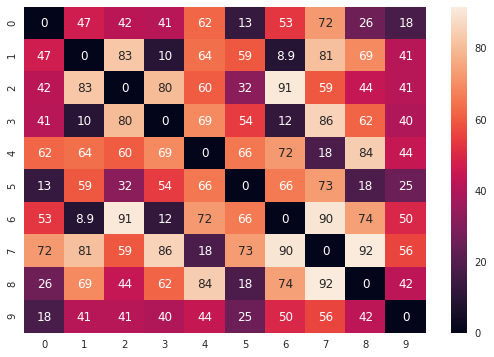

In [6]:
# Let's see put it all together

Z = np.random.randint(100, size=(10,2))

plot_heatmap(Z)
print(get_nearest_neighbour(Z, 2))

Your heatmap should look something similar to the one above. 